In [1]:
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt

"""
Load AirQualityUCI Data
"""

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

input_file = './data/AirQualityUCI_refined.csv'

df = pd.read_csv(input_file,
                 index_col=[0],
                 parse_dates=[0],
                 date_parser=parser)

C:\Users\sjy86\AppData\Local\Temp\ipykernel_13684\2428475719.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


<AxesSubplot:xlabel='Datetime'>

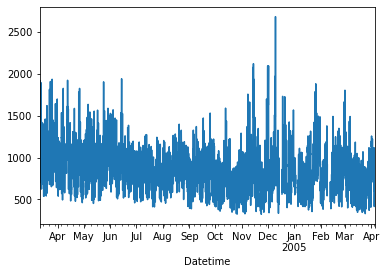

In [2]:
df['PT08.S3(NOx)'].plot()

In [3]:
nox = df['PT08.S3(NOx)'].copy()
nox.interpolate(inplace=True)

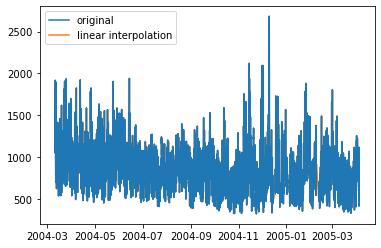

In [4]:
plt.plot(df['PT08.S3(NOx)'], label='original', zorder=2)
plt.plot(nox, label='linear interpolation', zorder=1)
plt.legend(loc='best')

Text(0.5, 0, 'PT08.S3(NOx)')

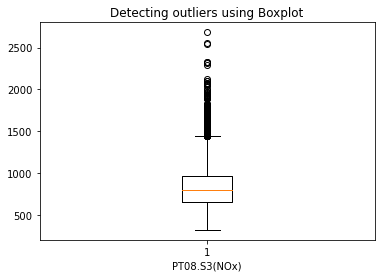

In [5]:
plt.boxplot(nox)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('PT08.S3(NOx)')

In [6]:
# Q1, Q2(median), Q3
q1 = nox.quantile(0.25)
median = nox.quantile(0.5)
q3 = nox.quantile(0.75)
print(q1, median, q3)

654.0 804.0 968.0


In [7]:
iqr = q3-q1
upper_fence = q3 + 1.5*iqr
lower_fence = q1 - 1.5*iqr
print(iqr, upper_fence, lower_fence)

314.0 1439.0 183.0


In [8]:
outliers = nox.loc[(nox > upper_fence) | (nox < lower_fence)]
print(outliers)

Datetime
2004-03-11 00:00:00    1462.0
2004-03-11 01:00:00    1453.0
2004-03-11 02:00:00    1579.0
2004-03-11 03:00:00    1705.0
2004-03-11 04:00:00    1818.0
                        ...  
2005-03-01 03:00:00    1791.0
2005-03-01 04:00:00    1804.0
2005-03-01 05:00:00    1727.0
2005-03-01 06:00:00    1677.0
2005-03-07 04:00:00    1490.0
Name: PT08.S3(NOx), Length: 239, dtype: float64


In [9]:
mask = nox.index.isin(outliers.index)

In [ ]:
plt.plot([~mask], label='normal', color='blue',
    marker='o', markersize=3, linestyle='None')
plt.plot(outliers, label='outliers', color='red',
    marker='x', markersize=3, linestyle='None')
plt.legend(loc='best')

In [11]:
nox_refined = nox.copy()
nox_refined[mask] = np.nan
print(nox_refined[mask])

Datetime
2004-03-11 00:00:00   NaN
2004-03-11 01:00:00   NaN
2004-03-11 02:00:00   NaN
2004-03-11 03:00:00   NaN
2004-03-11 04:00:00   NaN
                       ..
2005-03-01 03:00:00   NaN
2005-03-01 04:00:00   NaN
2005-03-01 05:00:00   NaN
2005-03-01 06:00:00   NaN
2005-03-07 04:00:00   NaN
Name: PT08.S3(NOx), Length: 239, dtype: float64


In [13]:
nox_refined.interpolate(inplace=True)

C:\Users\sjy86\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PT08.S3(NOx)', ylabel='Density'>

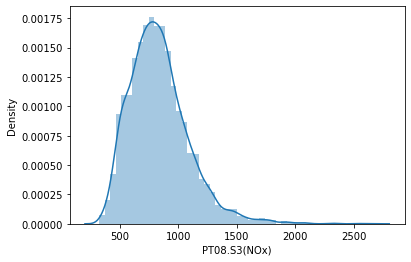

In [14]:
import seaborn as sns
sns.distplot(nox)

In [15]:
mean = np.mean(nox)
std = np.std(nox)
print(mean, std)

832.7588970823982 255.69616900657363


In [16]:
outliers = []
thres = 3 # Z-score threshold
for i in nox:
    z_score = (i-mean) / std
    if (np.abs(z_score) > thres):
        print(z_score)
outliers.append(i)

3.4112404042126165
3.8531711552247483
4.244260315412475
3.5402998270745667
3.3134681141656848
4.146488025365544
4.154309808569298
3.3330225721750715
3.0788146180530487
3.833616697215362
3.6106958759083576
3.7280226239646757
3.395596837805108
4.205151399393703
3.419062187416371
4.310745472644389
3.0162403524230124
3.168765124896226
3.051438376839908
3.387775054601353
3.5833196346952167
3.8844582880397667
3.4112404042126165
3.0592601600436624
3.8688147216322575
4.2638147734218625
3.6106958759083576
3.051438376839908
3.716289949159044
3.462081995037021
3.4777255614445304
3.8844582880397667
3.137477992081208
3.098369076062435
3.8101513476040982
4.189507832986194
3.794507781196589
3.763220648381571
4.334210822255653
4.240349423810598
3.4034186210088624
3.6146067675102347
3.254804740137526
3.0045076776173807
3.2469829569337714
3.168765124896226
3.6693592499365164
4.8660920801109615
4.807428706082803
4.424161329098831
3.7553988651778165
3.2508938485356484
3.4542602118332666
5.038171310593562


In [17]:
nox.loc[np.abs((nox-mean) / std) > 3]

Datetime
2004-03-11 03:00:00    1705.0
2004-03-11 04:00:00    1818.0
2004-03-11 05:00:00    1918.0
2004-03-11 06:00:00    1738.0
2004-03-12 03:00:00    1680.0
                        ...  
2005-02-28 06:00:00    1665.0
2005-03-01 03:00:00    1791.0
2005-03-01 04:00:00    1804.0
2005-03-01 05:00:00    1727.0
2005-03-01 06:00:00    1677.0
Name: PT08.S3(NOx), Length: 111, dtype: float64

In [19]:
mask_nox = nox.index.isin([outliers.index])

In [20]:
print(mask[:50])

[False False False False False False  True  True  True  True  True  True
  True  True False False False False False False False False False False
 False False False False False  True False False False  True  True  True
  True False False False False False False False False False False False
 False False]


C:\Users\sjy86\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sjy86\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


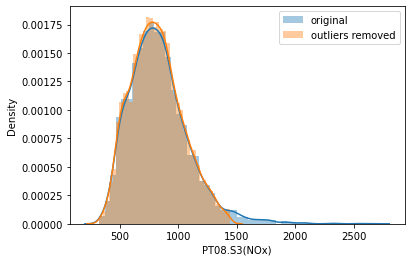

In [22]:
sns.distplot(nox, axlabel='PT08.S3(NOx)', label='original')
sns.distplot(nox[~mask], label='outliers removed')
plt.legend(loc='best')